In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns

In [8]:
df = pd.read_csv('./train.csv')
df.columns.to_list()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [5]:
df.loc[:,['YrSold', 'SalePrice']].groupby(['YrSold']).describe()

SalePrice                                                            \
           count           mean           std      min       25%       50%   
YrSold                                                                       
2006       314.0  182549.458599  79426.838855  35311.0  131375.0  163995.0   
2007       329.0  186063.151976  85768.171410  39300.0  129900.0  167000.0   
2008       304.0  177360.838816  69735.610685  40000.0  131250.0  164000.0   
2009       338.0  179432.103550  80879.237311  34900.0  125250.0  162000.0   
2010       175.0  177393.674286  80451.280085  55000.0  128100.0  155000.0   

                            
             75%       max  
YrSold                      
2006    218782.5  625000.0  
2007    219500.0  755000.0  
2008    207000.0  446261.0  
2009    212750.0  582933.0  
2010    213250.0  611657.0

In [6]:
df.loc[:,['GarageCars', 'SalePrice']].groupby(['GarageCars']).describe()

SalePrice                                                    \
               count           mean            std       min       25%   
GarageCars                                                               
0               81.0  103317.283951   32815.023389   34900.0   82500.0   
1              369.0  128116.688347   30412.386890   35311.0  110000.0   
2              824.0  183851.663835   51617.144258   55993.0  148000.0   
3              181.0  309636.121547  106832.925939   81000.0  246578.0   
4                5.0  192655.800000   52621.839745  123000.0  168000.0   

                                          
                 50%       75%       max  
GarageCars                                
0           100000.0  124000.0  200500.0  
1           128000.0  142000.0  266500.0  
2           177750.0  213000.0  430000.0  
3           295000.0  367294.0  755000.0  
4           200000.0  206300.0  265979.0

In [10]:
df['age'] = max(df['YearBuilt'])-df['YearBuilt']

variables = ['YrSold', 'GarageCars', 'SalePrice', 'age']
df = df.loc[:,variables]
df.head()

,YrSold,GarageCars,SalePrice,age
0,2008,2,208500,7
1,2007,2,181500,34
2,2008,2,223500,9
3,2006,3,140000,95
4,2008,3,250000,10


In [11]:
from sklearn.model_selection import train_test_split

def quick_tree(df,depth=5):
    # Resample and Process data:
    df_t = df.sample(n=df.shape[0],replace=True)
    y = df_t['SalePrice']
    X = df_t.drop(['SalePrice'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    # Fit decision tree:
    cart = tree.DecisionTreeRegressor(max_depth=depth) # Create a classifier object
    cart = cart.fit(X_test, y_test) # Fit the classifier
    # Visualize results:
    tree.plot_tree(cart,feature_names=X_train.columns.to_list(),filled=True)
    # Rsq:
    y_hat = cart.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    TSS = np.sum( (y_test-y_train.mean())**2 )
    Rsq = 1 - SSE/TSS
    print(Rsq)

0.6344118628055692


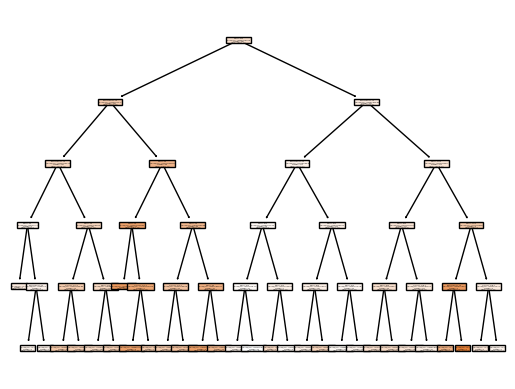

In [26]:
quick_tree(df)

In [24]:
# Split data into training rows and testing rows:
N = df.shape[0]
df = df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)
df_train = df[0:train_size]
N_train = df_train.shape[0]
df_test = df[train_size:]
N_test = df_test.shape[0]

# Bootstrap:
T = 1000
m_depth = 5
Rsq = np.zeros(T) # preallocate the rsq measure
y_test_hat = np.zeros([T,N_test]) # preallocate predictions on test set
df_train.head()

# Split data into train/test:
X_train = df_train.drop(['SalePrice'],axis=1)
y_train = df_train['SalePrice']
X_test = df_test.drop(['SalePrice'],axis=1)
y_test = df_test['SalePrice']

# Bootstrapping:
for s in range(T):
    # Generate a bootstrap sample:
    df_s = df_train.sample(frac=1, replace=True)
    X_s = df_s.drop('SalePrice',axis=1)
    y_s = df_s['SalePrice']
    # Fit decision tree:
    cart = tree.DecisionTreeRegressor(max_depth=m_depth) # Create a classifier object
    cart = cart.fit(X_s, y_s) # Fit the classifier
    # Compute Rsq:
    y_hat = cart.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    TSS = np.sum( (y_test-y_s.mean())**2 )
    Rsq[s] = 1 - SSE/TSS
    # Make and Save Predictions:
    y_test_hat[s,:] = y_hat

# Ensemble predictor:
y_hat_ensemble = y_test_hat.mean(axis=0) # Average the columns to get the ensemble prediction
SSE = np.sum( (y_test-y_hat_ensemble)**2 )
TSS = np.sum( (y_test-y_train.mean())**2 )
Rsq_ensemble = 1 - SSE/TSS

print(Rsq_ensemble)

0.5378596487015848


0.5458596719197889


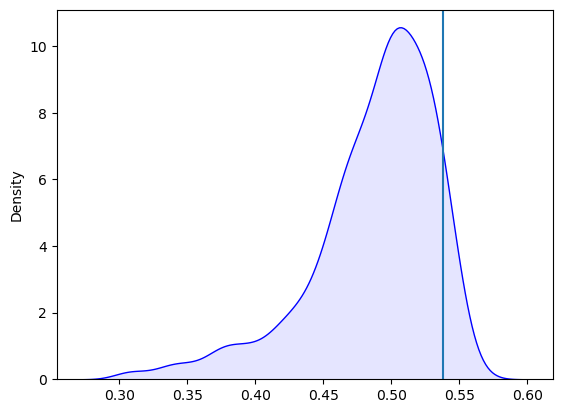

In [25]:
ax = sns.kdeplot(x = Rsq, fill = True, color = "blue", alpha = 0.1)
ax.axvline(x = Rsq_ensemble)

print(np.quantile(Rsq,.97))

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Fit model:
model = RandomForestRegressor() # Build a random forest model
rf = model.fit(X_train,y_train) # Fit the rf model

# Make predictions:
y_hat_rf = rf.predict(X_test) # Model predictions

<Axes: xlabel='SalePrice'>

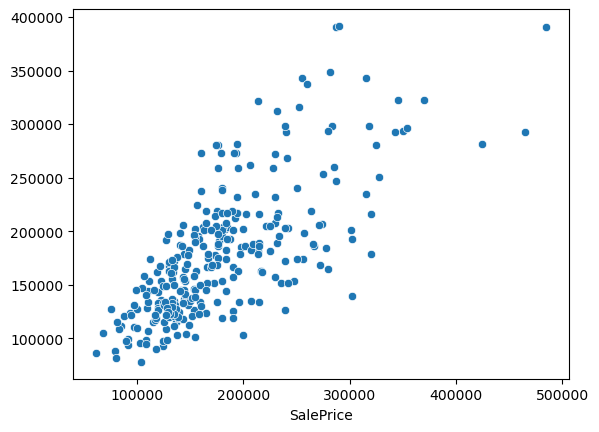

In [28]:
sns.scatterplot(x=y_test, y=y_hat_rf) # Predicted v Actual

<Axes: xlabel='SalePrice', ylabel='Density'>

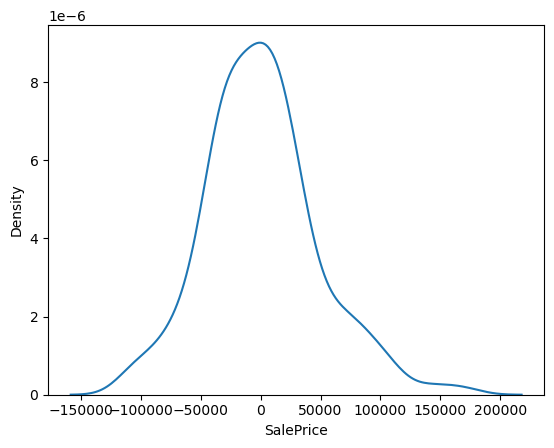

In [29]:
# Residual plot:
residual = y_test - y_hat_rf
sns.kdeplot(x=residual)

In [30]:
rf.score(X_test,y_test) # Rsq measure

0.49448859312384275

Text(24.000000000000007, 0.5, 'Mean decrease in impurity')

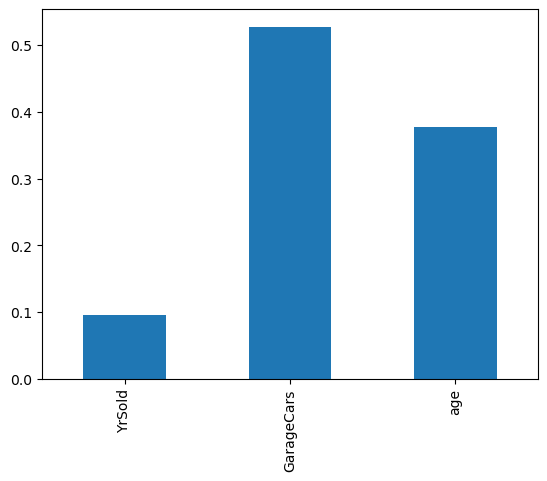

In [31]:
# Variable importance plot:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns )
forest_importances.plot.bar()
ax.set_ylabel("Mean decrease in impurity")